# ライトカーブを描く

- ds9のregionで星を選択


In [1]:
#module import
 
import numpy as np
import matplotlib.pyplot as plt
from SI_function import ImageReduction as IR
from SI_function import LightCurveFunction as LCF


In [2]:
"""================================="""
input_list = '../WASP-43/Light/out/light_dfs.list'   #skyまで引いたデータ　時系列で並べる
reg_file = '../WASP-43/select.reg'  #
displacement_file = '../WASP-43/displacement.txt'   #ここに計算したdipslacementを格納  あるいはこれを読み込んで使用。
r_pix = False   #pix 重心を決定する際に使う半径 これをfalseにした場合は regionの半径を採用する。
half_aperture_fwhm = 10  #FWHMを求める際に使う半径　基本的に同程度の明るさの星を扱うのでこれは固定で良い　返ってきた結果がおかしい時は調整する ただしあまりここは動作が良くないぽい
half_aperture = False  #pix 開口測光の"半径" これをfalseにした場合は、3*FWHMで測光する
local_bkg = True #測光する際に周りを使うかどうか

In [3]:
#開く
#PATHの設定
PATH, output_name = IR.set_PATH_name(input_list, output_file='dummy', type = 'light')
#画像オープン
images, hdrs = IR.open_fits_multi(input_list, PATH)
#skyを引いた際の誤差を修正
images = LCF.sky_offset(images, hdrs)

In [4]:
#画像のずれを計算して変移を取得
displacements = LCF.calc_read_displacements(images, displacement_file)

read existing file: ../WASP-43/displacement.txt


In [5]:
#region ファイルを開いて測光するポイントを取得
circles = LCF.open_reg_circle(reg_file)
#regionファイルでターゲット星を示すインデックスを返す
target = LCF.get_target(circles)

In [6]:
photometries = LCF.do_aperture_photometry(images, displacements, circles, target, r_pix, half_aperture, half_aperture_fwhm, local_bkg = local_bkg)

FWHM: target 4.503375017857021, reference(s) 4.122434460201511 4.532594795603228 pix


100%|█████████████████████████████████████████| 350/350 [00:03<00:00, 90.19it/s]


In [7]:
#ラベル用
dates = LCF.get_hdr_date(hdrs)
label = []
date_seconds = []
for i in range(len(dates)):
    label.append(dates[i].show_date())
    date_seconds.append(dates[i].return_seconds())
    

([<matplotlib.axis.XTick at 0x11f8533a0>,
 [Text(902548.0, 0, '2018/3/10 10:42:28.0'),
  Text(903148.0, 0, '2018/3/10 10:52:28.0'),
  Text(903748.0, 0, '2018/3/10 11:2:28.0'),
  Text(904348.0, 0, '2018/3/10 11:12:28.0'),
  Text(904948.0, 0, '2018/3/10 11:22:28.0'),
  Text(905548.0, 0, '2018/3/10 11:32:28.0'),
  Text(906148.0, 0, '2018/3/10 11:42:28.0'),
  Text(906748.0, 0, '2018/3/10 11:52:28.0'),
  Text(907348.0, 0, '2018/3/10 12:2:28.0'),
  Text(907948.0, 0, '2018/3/10 12:12:28.0'),
  Text(908548.0, 0, '2018/3/10 12:22:28.0'),
  Text(909148.0, 0, '2018/3/10 12:32:28.0'),
  Text(909748.0, 0, '2018/3/10 12:42:28.0'),
  Text(910348.0, 0, '2018/3/10 12:52:28.0'),
  Text(910948.0, 0, '2018/3/10 13:2:28.0'),
  Text(911548.0, 0, '2018/3/10 13:12:28.0'),
  Text(912148.0, 0, '2018/3/10 13:22:28.0'),
  Text(912748.0, 0, '2018/3/10 13:32:28.0'),
  Text(913348.0, 0, '2018/3/10 13:42:28.0'),
  Text(913948.0, 0, '2018/3/10 13:52:28.0'),
  Text(914548.0, 0, '2018/3/10 14:2:28.0'),
  Text(915148.0, 

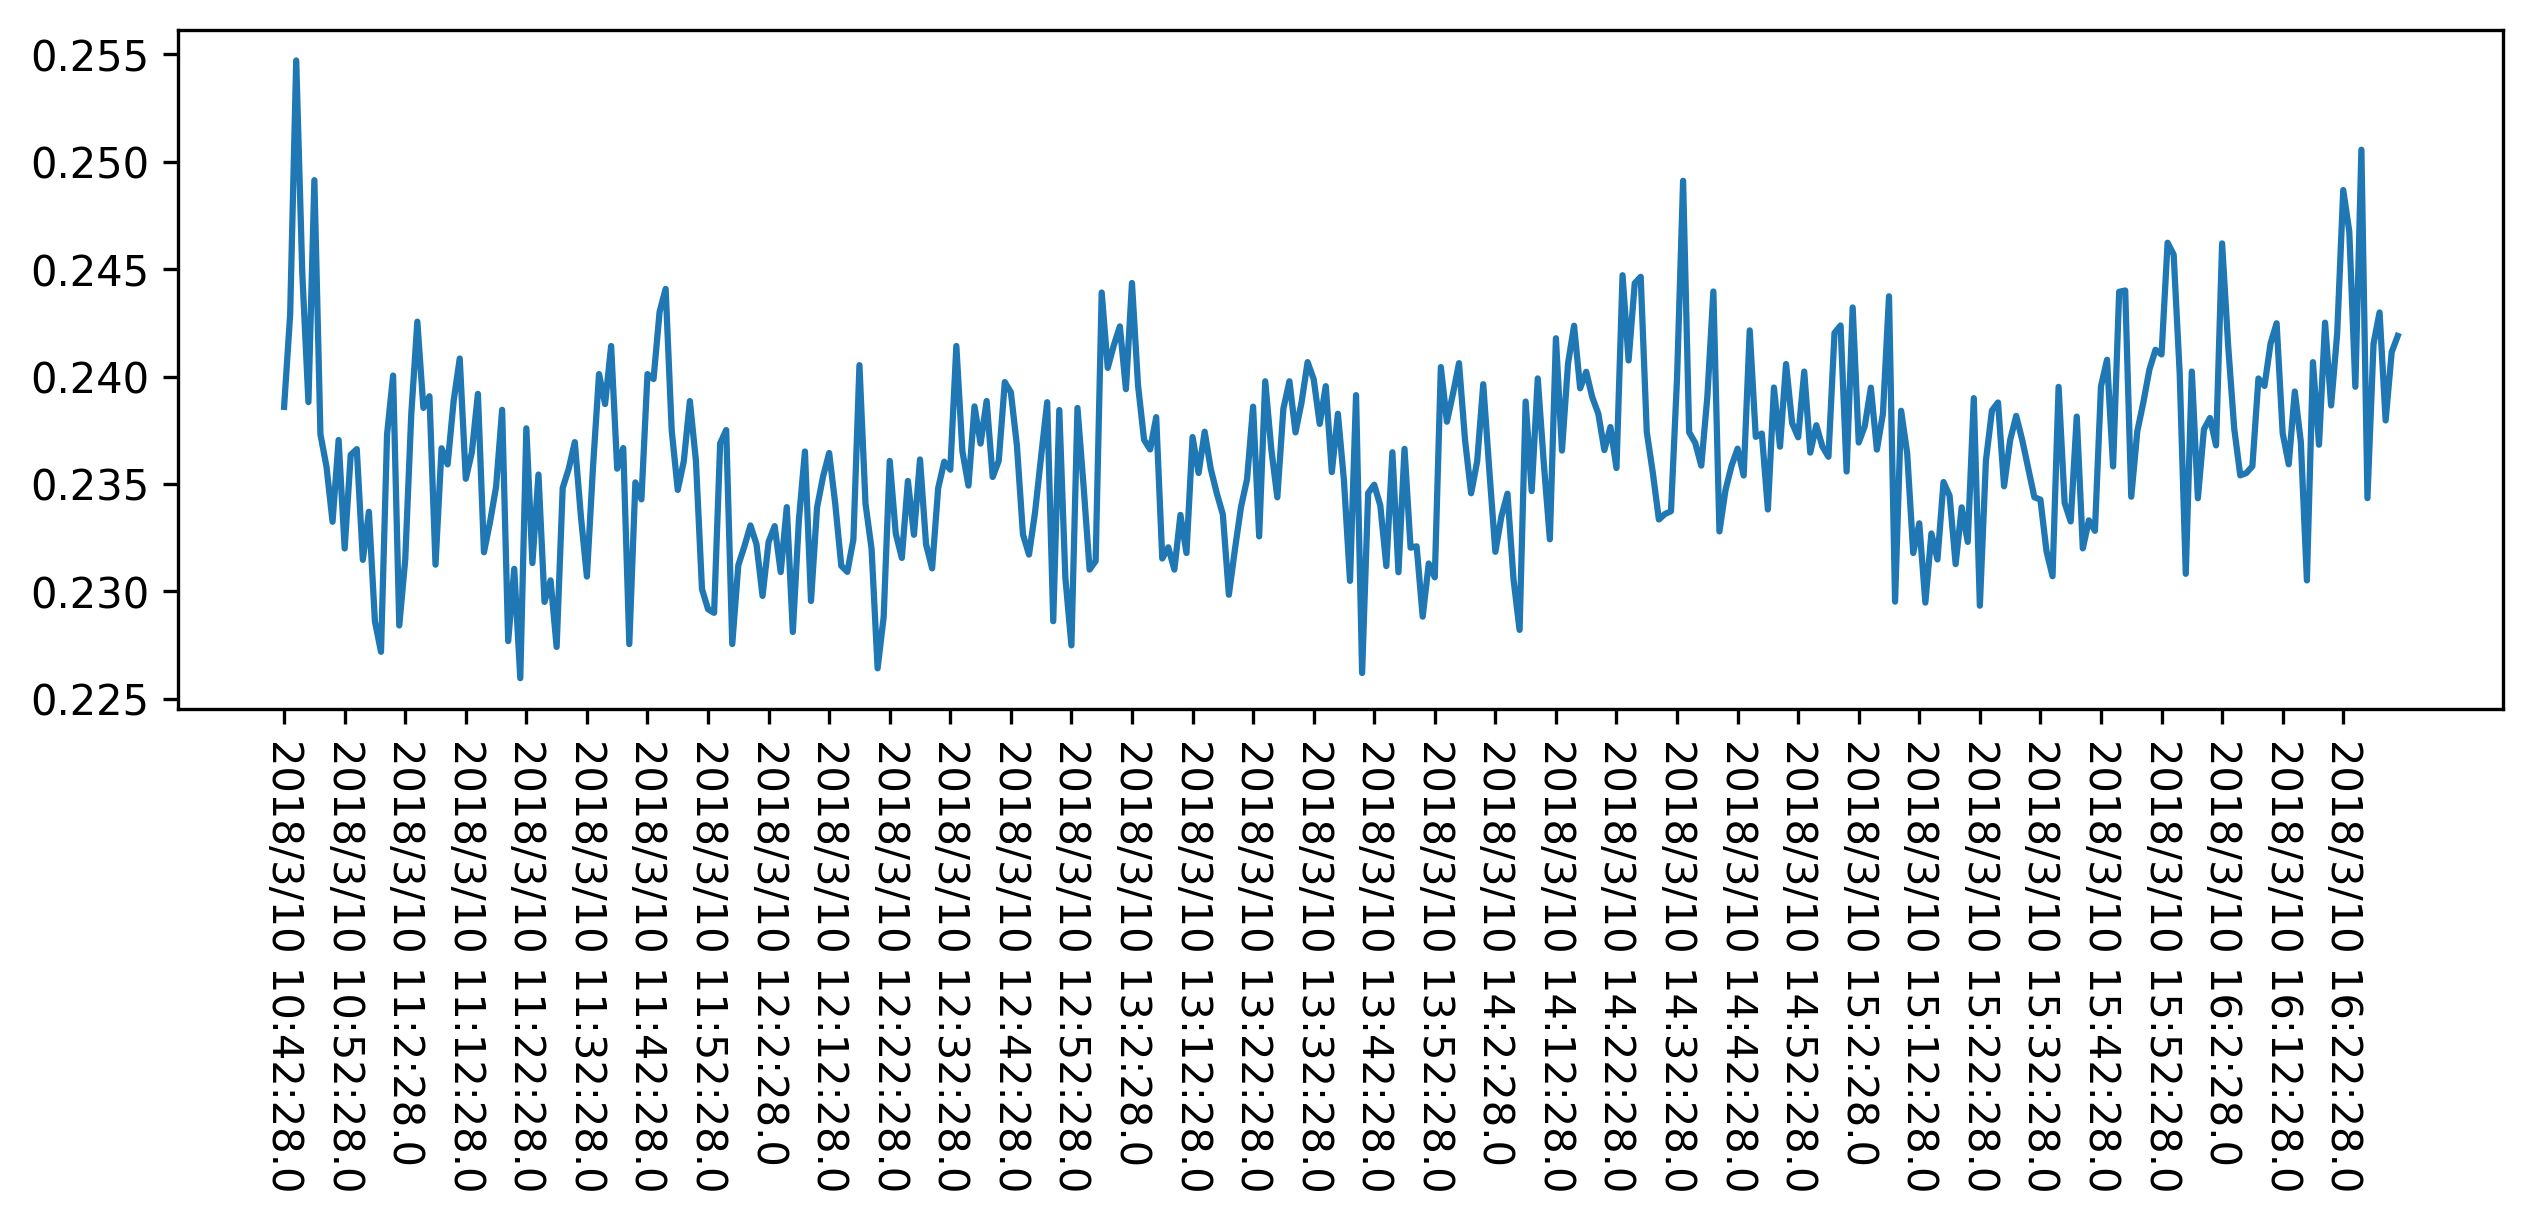

In [8]:
fig=plt.figure(figsize=(10,3),dpi = 300)
fig.patch.set_facecolor('white')
plt.plot(date_seconds, np.array(photometries)[:,1]/np.array(photometries)[:,2])
#plt.plot(date_seconds, np.array(flux_target))
plt.xticks(date_seconds[0:len(date_seconds):10], label[0:len(date_seconds):10],rotation = -90)